# CSCI 3022: Intro to Data Science - Fall 2017 Practicum 
***


This practicum is due on Moodle by **11:59pm on Wednesday December 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: Hee Su Chang

**Section**: 001
***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import statsmodels.api as sm 
import matplotlib.pylab as plt
%matplotlib inline

### [40 points] Problem 1: Parking Problems 
***

Imagine that there are 50 parking spots on a street. A store is located at position 0, and each parking space along the street is numbered according to its distance from the store, so that the space right in front of the store is spot 0, the next is spot 1, and so on up until the end of the block, which is spot 49.

**Prof. Ketelsen is direct and systematic**. He enters the street and drives all the way to the store, which takes him 90 seconds. Then, he drives incrementally away from the store, taking 2 seconds for each parking spot that he checks. He parks in the first empty spot (after he checks it) and then walks to the store from there, covering ground at a rate of 5 seconds per parking spot. If Chris parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he makes it to the end of the road with not a single parking spot to be found, he parks in his secret spot, which is always free, but far away, which takes him an additional 5 minutes beyond the time he already spent using his parking strategy.

**Prof. Larremore is strategic and prone to overthinking**. He enters the street at the end, position 49, and starts driving toward the store, but checks each spot that he passes, taking 2 second to check each. But, in an attempt to be clever, he doesn’t park in the first spot he sees, because what if there’s a closer spot? Instead, he passes n empty spots and then parks in the next empty spot he sees (after he checks it). From where he parks on the street, he walks to the store at a speed of 5 seconds per parking spot. Just like Chris, if Dan parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he gets all the way to the store without parking, he parks in his own secret spot, which is always free, but not really close, which takes him an additional 3 minutes beyond the time he already spent using his parking strategy.

**Part A**: Write a function **chris_park_time**$(\hspace{.5mm}p)$ that performs a single trial and returns the total time, in seconds, for Chris to get to the store, given the probability that each spot is occupied by a car already, $p$. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [44]:
def chris_park_time(p):
    time = 90
    parked = False
    spot = 0
    while parked == False and spot < 50:
        time = time + 2
        probs = [p, 1-p]
        empty = np.random.choice([0,1], p=probs)
        if empty == 0: #spot isn't empty
            spot = spot + 1
        else:
            parked = True
    if spot == 50:
        time = time + 5 * 60
    else:
        time = time + 5 * spot
    return time
print("Probability = 0:",chris_park_time(0))
print("Probability = 0.5:",chris_park_time(0.5))
print("Probability = 1:",chris_park_time(1))

Probability = 0: 92
Probability = 0.5: 113
Probability = 1: 490


We can check the minimum and maximum values and also in between to make sure.

**Part B**: Write a function **dan_park_time**$(\hspace{.5mm}p, n)$ that performs a single trial and returns the total time, in seconds, for dan to get to the store, where $n$ is the number of empty spots he passes before taking the next available spot. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [49]:
def dan_park_time(p, n):
    time = 0
    parked = False
    passed = 0
    spot = 49
    while parked == False and spot >= 0:
        time = time + 2
        probs = [p, 1-p]
        empty = np.random.choice([0,1], p=probs)
        if empty == 0: #spot isn't empty
            spot = spot - 1
        elif passed < n:
            passed = passed + 1
            spot = spot - 1
        else:
            parked = True
    if spot == -1:
        time = time + 3 * 60
    else:
        time = time + 5 * spot
    return time
print("Probability = 0, n=0:",dan_park_time(0, 0))
print("Probability = 0.5, n=4:",dan_park_time(0.5, 4))
print("Probability = 1:, n=0",dan_park_time(1, 0))

Probability = 0, n=0: 247
Probability = 0.5, n=4: 217
Probability = 1:, n=0 280


We can make sure that we reach the maximum value when we should and don't when we give reasonable paramters.

**Part C**: Run simulations to evaluate their parking strategies on a sleepy Tuesday morning when the probability of a parking space being occupied is $p=0.6$.  Perform $1000$ trials each for Chris's strategy and Dan's strategy with parameters $n=1,2,$ and $3$. Plot 4 histograms, one on top of the other, for the resulting parking times with bin boundaries at $[0, 10, 20, \ldots, 300]$.  Be sure to label all axes and provide meaningful titles for each histogram.  Based on your histograms, which of the four strategies appears to be the best? 

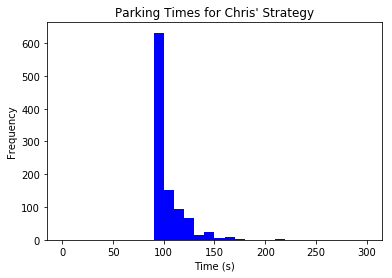

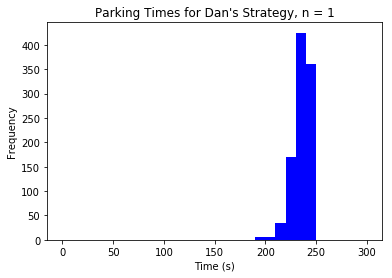

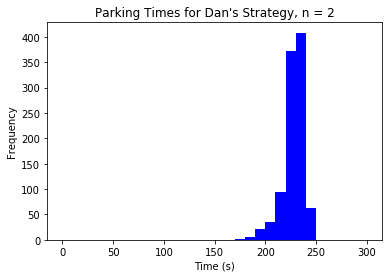

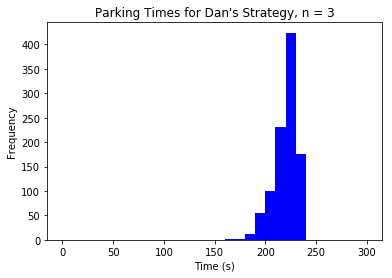

In [4]:
def four_simulations(p, n):
    c = []
    d1 = []
    d2 = []
    d3 = []
    for i in range(n):
        c.append(chris_park_time(p))
        d1.append(dan_park_time(p, 1))
        d2.append(dan_park_time(p, 2))
        d3.append(dan_park_time(p, 3))

    plt.hist(c, [i*10 for i in range(31)], color = 'b')
    plt.title("Parking Times for Chris' Strategy")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency")
    plt.show()
    plt.hist(d1, [i*10 for i in range(31)], color = 'b')
    plt.title("Parking Times for Dan's Strategy, n = 1")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency")
    plt.show()
    plt.hist(d2, [i*10 for i in range(31)], color = 'b')
    plt.title("Parking Times for Dan's Strategy, n = 2")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency")
    plt.show()
    plt.hist(d3, [i*10 for i in range(31)], color = 'b')
    plt.title("Parking Times for Dan's Strategy, n = 3")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency")
    plt.show()
four_simulations(0.6, 1000)

Chris' strategy appears to be the best by a long shot.

**Part D**: Run simulations with at least $1000$ trials and plot estimates of the expected parking time on a single graph for Chris's strategy and Dan's strategy with parameters $p=0.6$ and $n=0, 1, \ldots, 25$. Report the optimal parameter $n$ for Dan's strategy and use your plot to decide whose strategy is better. 

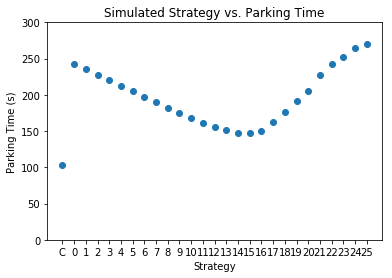

In [5]:
def single_graph(p, n):
    estimates = []
    labels = ["C"]
    sum = 0
    for i in range(n):
        sum = sum + chris_park_time(p)
    estimates.append(sum/n)
    for i in range(26):
        labels.append(i)
        sum = 0
        for j in range(n):
            sum = sum + dan_park_time(p, i)
        estimates.append(sum/n)
    plt.ylim(0, 300)
    plt.xticks(range(27), labels)
    plt.plot(estimates,linestyle="",marker="o")
    plt.title("Simulated Strategy vs. Parking Time")
    plt.xlabel("Strategy")
    plt.ylabel("Parking Time (s)")
    plt.show()
single_graph(0.6, 1000)

Chris' strategy is still superior. For Dan, the most ideal parameter n for this probability p would be n=14.

**Part E**: Repeat **Part C** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

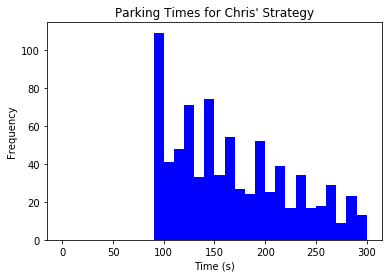

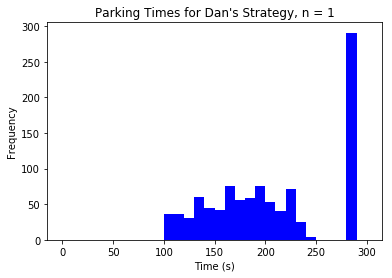

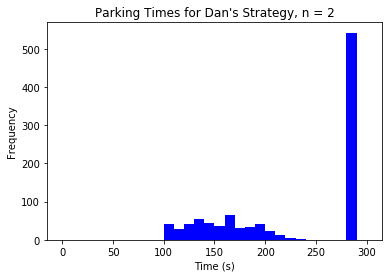

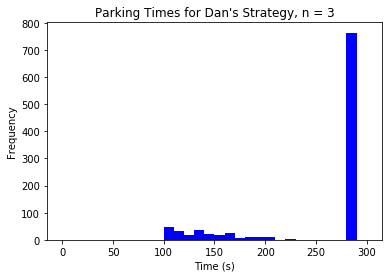

In [6]:
four_simulations(0.95, 1000)

**Part F**: Repeat **Part D** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

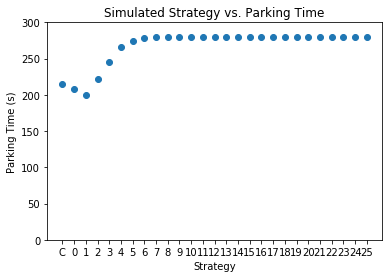

In [7]:
single_graph(0.95, 1000)

**Part G**: Analytically determine a formula for Chris's expected parking time as a function of the parameter $p$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

$90 + \sum_{i=0}^{49} \{p^{i}(1-p)\times (2(i+1)+5i)\} + p^{50}\times(100+300)$

In [50]:
def c_formula(p):
    time = 90
    for i in range(50):
        time = time + (p**i)*(1-p)*(2*(i+1)+5*i) 
    time = time + (p**50)*(100+300)
    return time
print("p=0:",c_formula(0))
print("p=0.6:",c_formula(0.6))
print("p=0.95:",c_formula(0.95))
print("p=:1",c_formula(1))

p=0: 92
p=0.6: 102.50000000030309
p=0.95: 218.45967710147926
p=:1 490


**Part H**: Analytically determine a formula for Dan's expected parking time as a function of parameters $p$ and $n$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

$\sum_{i=n}^{49}\{{i \choose n}p^{i-n}(1-p)^{n}\times (2(i+1)+5(49-i))\} + (1-\sum_{i=n}^{49}\{{i \choose n}p^{i-n}(1-p)^{n}\})\times(100+180)$

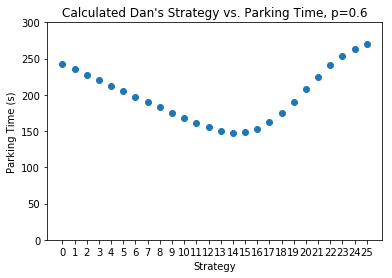

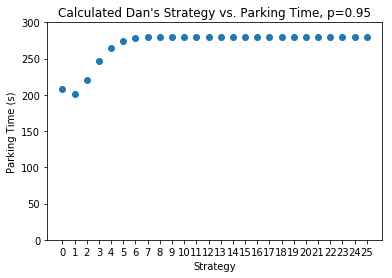

In [9]:
def factorial(n):
    product = 1
    if n == 0:
        return 1
    else:
        for i in range(n):
            product = product * (i+1)
        return product

def d_formula(p, n):
    time = 0
    prob = 0
    for i in range(n,50):
        prob = prob + (factorial(i)/factorial(n)/factorial(i-n))*(p**(i-n))*((1-p)**(n+1))
        time = time + (factorial(i)/factorial(n)/factorial(i-n))*(p**(i-n))*((1-p)**(n+1))*(2*(i+1)+5*(49-i))
    time = time + (1-prob)*(100+180)
    return time
plt.ylim(0, 300)
plt.xticks(range(26), [i for i in range(26)])
plt.plot([d_formula(0.6, y) for y in range(26)],linestyle="",marker="o")
plt.title("Calculated Dan's Strategy vs. Parking Time, p=0.6")
plt.xlabel("Strategy")
plt.ylabel("Parking Time (s)")
plt.show()

plt.ylim(0, 300)
plt.xticks(range(26), [i for i in range(26)])
plt.plot([d_formula(0.95, y) for y in range(26)],linestyle="",marker="o")
plt.title("Calculated Dan's Strategy vs. Parking Time, p=0.95")
plt.xlabel("Strategy")
plt.ylabel("Parking Time (s)")
plt.show()

We can see that my analytically computed formula matches up well with the graph from our simulations.

**Part I**: Use the formulas you found in **Parts G** and **H** to make an argument about whose strategy is better — and, if the answer is it depends, explain which values of $p$ and/or $n$ allow Chris to get to the store faster than Dan. Provide any graphical summaries necessary to justify your conclusion. 

**Note**: While we hope that you come up with correct analytic formulas in **Parts G** and **H**, you may feel free to use the code written above to do this analysis using simulation estimates. 

If the parking lot is very busy (something like p=0.95), you will be better following Dan's strategy with n=1 and n=2.
If it's not (something like p=0.6 or less), you will be better following Chris' strategy.

### [30 points] Problem 2: Gender Balance in Movements Between Academic Disciplines
***

Every year, the online academic resume service, ORCID, dumps the data from all of the professors who have their privacy settings set to “public” so that the research community can learn about the makeup of the academic workforce. In this real-data problem, we’re going to study the flows of professors between different academic fields to learn about gender differences. We’ll use a pre-processed dataset used by actual researchers studying gender imbalance across fields.

First, some information about the data. For each of the 1.6 million professors in the public ORCID data dump, the researchers determined (a) what field they are currently in, (b) what field they did their PhD in, and (c) their gender. Here, because the goal of the study was originally to learn about disparities between men and women, gender was coded by the researchers as male or female, as indicated by the professors. Those who chose not to mark their gender as public were not included in the processed dataset.

The researchers have provided CSCI 3022 with two files: **totals.csv** and **switch_edgelist.csv**. The first file enumerates the total numbers of men and women in each of $30$ different fields. The second file enumerates the total numbers of men and women who switched from one field to another field during their career.

The null hypothesis about the data is that the gender balance of people leaving field $X$ is the same as the gender balance in field $X$. For example, if Anthropology is $50\%$ women and $50\%$ men, we expect people who have moved from Anthropology to another field to reflect this $50/50$ balance. On the other hand, if Physics is only $15\%$ women and $85\%$ men, we expect people who have moved from Physics to another field to reflect a $15/85$ balance.

In symbolic form, we might write this as follows. Let the proportion of professors in field i who are women be given by $p_i$, and let the proportion of women who move from field i to some other field be given by $q_i$. Then the expected result is that $p_i$ = $q_i$. The researchers are interested to know if there is statistical evidence that $p_i \neq q_i$ for any of the fields $i$.

**Part A**: Wrangle those data files. Then, make a plot of $p_i$ for all $i = 1, 2, \ldots, 30$ fields using a green color, and on the same axes, plot $q_i$ using a blue color.

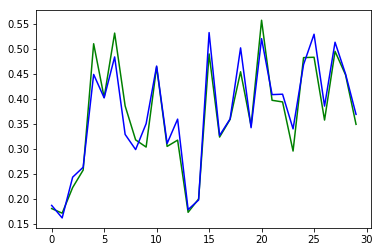

In [34]:
dfTotals = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/totals.csv")
dfSwitch = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/switch_edgelist.csv")
dfTotMale = dfTotals.loc[dfTotals["gend_cat"] == "male"]
dfTotFemale = dfTotals.loc[dfTotals["gend_cat"] == "female"]
dfSwiMale = dfSwitch.loc[dfSwitch["gend_cat"] == "male"]
dfSwiFemale = dfSwitch.loc[dfSwitch["gend_cat"] == "female"]
p = []
q = []
for index, row in dfTotFemale.iterrows():
    maleTotN = int((dfTotMale.loc[dfTotMale["field"]==row["field"]])["N"])
    femaleTotN = int(row["N"])
    p.append(femaleTotN/(maleTotN+femaleTotN))
for index, row in dfTotFemale.iterrows():   
    maleSwiN = int(np.sum((dfSwiMale.loc[dfSwiMale["from"]==row["field"]])["N"]))
    femaleSwiN = int(np.sum((dfSwiFemale.loc[dfSwiFemale["from"]==row["field"]])["N"]))
    q.append(femaleSwiN/(maleSwiN+femaleSwiN))
plt.plot(p, color="green")
plt.plot(q, color="blue")
plt.show()

**Part B**: At the $\alpha = 0.05$ significance level, use the method of your choice to determine whether there is sufficient evidence that $p_i \neq q_i$. Be sure to explain why you are justified in using the method that you used, and report the numbers that helped you make your decision for each of the fields. Please use only methods we have discussed in class. Then, replicate your plot from **Part A** and add a red symbol to those fields, if any, where $p_i$ and $q_i$ are statistically different at the given significance level. Comment on any significant findings.  

[2, 4, 6, 7, 9, 12]
['mathematics', 'education', 'psychology', 'communications', 'political science', 'economics']


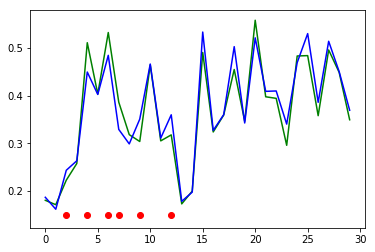

In [35]:
def p_not_q(alpha=0.05):
    flagged_indexes = []
    clt = True
    for index, row in dfTotFemale.iterrows():
        maleTotN = int((dfTotMale.loc[dfTotMale["field"]==row["field"]])["N"])
        femaleTotN = int(row["N"])
        if(maleTotN + femaleTotN < 30):
            clt = False
    for index, row in dfTotFemale.iterrows():   
        maleSwiN = int(np.sum((dfSwiMale.loc[dfSwiMale["from"]==row["field"]])["N"]))
        femaleSwiN = int(np.sum((dfSwiFemale.loc[dfSwiFemale["from"]==row["field"]])["N"]))
        if(maleSwiN + femaleTotN < 30):
            clt = False
    if(clt == True):
        ind = 0
        fields = []
        for index, row in dfTotFemale.iterrows():
            maleTotN = int((dfTotMale.loc[dfTotMale["field"]==row["field"]])["N"])
            femaleTotN = int(row["N"])
            m = maleTotN + femaleTotN
            p1 = femaleTotN/m
            maleSwiN = int(np.sum((dfSwiMale.loc[dfSwiMale["from"]==row["field"]])["N"]))
            femaleSwiN = int(np.sum((dfSwiFemale.loc[dfSwiFemale["from"]==row["field"]])["N"]))
            n = maleSwiN + femaleSwiN
            p2 = femaleSwiN/n
            z = stats.norm.ppf(1-alpha/2)
            meandiff = p1 - p2
            se = np.sqrt(p1*(1-p1)/m + p2*(1-p2)/n)
            CI = [meandiff-z*se, meandiff+z*se]
            if(CI[0]*CI[1] > 0):
                fields.append(row["field"])
                flagged_indexes.append(ind)
            ind = ind + 1
    print(flagged_indexes)
    print(fields)
    plt.plot(p, color="green")
    plt.plot(q, color="blue")
    plt.scatter(flagged_indexes,[0.15 for i in flagged_indexes], color="red")
    plt.show()
p_not_q(0.05)

The only times p_i and q_i were statistically different were toward the beginning of the dataset. I also thought there would be some form of disparity in STEM fields but that was not the case.

**Part C**: Repeat the procedure from **Part B** at the $\alpha = 0.01$ level. 

[4, 6, 7, 12]
['education', 'psychology', 'communications', 'economics']


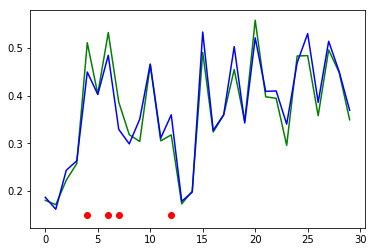

In [12]:
p_not_q(0.01)

### [30 points] Problem 3: Multiple Linear Ralphie-gression 
***

After years of study and professional development, you have finally landed your dream job as Ralphie's data-driven lead handler.  As your first project, you wish to use multiple linear regression to understand and predict what makes Ralphie happy, as measured during halftime of home football games.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file ralphie.csv. 

**Response**: 

- $\texttt{happiness}$: Ralphie's happiness, measured by a complicated formula involving rate of tail flicks, happy-sounding snorts, and numerous other factors 

**Features**: 

- $\texttt{hay freshness}$: freshness of Ralphie's hay, measured in Freshies 
- $\texttt{coat silkiness}$: silkiness of Ralphie's coat, measured in Larremores 
- $\texttt{run length}$: the length of Ralphie's halftime run, measured in yards 
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{SCMLP}$: the snow-capped majesty of Longs Peak, measured as a fraction between 0 and 1  
- $\texttt{mean GPA}$: mean GPA of Ralphie's handlers 
- $\texttt{score diff}$: the score differential (CU's score minus Opponent' score) at halftime 
- $\texttt{star yards}$: the number of rushing yards by CU's star running back at halftime 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the concession stand 
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on game day 


**Part A**: Read the data from **ralphie.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [13]:
dfRalphie = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/practicum/data/ralphie.csv")
dfRalphie = dfRalphie.dropna()
dfRalphie["hay freshness"] = dfRalphie["hay freshness"].map(lambda x: float(str(x)[:-1]))
dfRalphie["coat silkiness"] = dfRalphie["coat silkiness"].map(lambda x: float(str(x)[:-1]))
dfRalphie["temp"] = dfRalphie["temp"].map(lambda x: float(str(x)[:-1]))
dfRalphie.head(20)

,happiness,hay freshness,coat silkiness,run length,temp,SCMLP,handler GPA,score diff,star yards,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62.0,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63.0,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55.0,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52.0,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57.0,0.89,2.40,-6.0,43.0,186.0,0.0
5,98.24,86.6,7.7,259.0,71.0,1.00,3.60,-6.0,36.0,102.0,2.0
6,137.26,89.0,7.1,246.0,55.0,0.89,2.71,1.0,18.0,179.0,0.0
7,83.38,85.9,6.3,261.0,33.0,0.11,3.86,-16.0,150.0,183.0,0.0
8,102.26,94.8,7.0,243.0,70.0,1.00,2.34,-5.0,38.0,200.0,1.0
9,84.03,98.3,7.4,244.0,89.0,1.00,3.77,-8.0,54.0,184.0,1.0


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

In [14]:
y, X = dfRalphie["happiness"], dfRalphie.iloc[:,1:]

# Add constant to X 
X = sm.add_constant(X)

# Fit OLS model 
model = sm.OLS(y, X.astype(float)).fit() 

# Print model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     572.2
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           8.10e-66
Time:                        03:53:40   Log-Likelihood:                -249.37
No. Observations:                  85   AIC:                             520.7
Df Residuals:                      74   BIC:                             547.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            -35.2765     13.517     -2.610      0.011       -62.210    -8.343
hay freshness      0.9940      0.113      8.832      0.000         0.770     1.218
coat silkiness     4.0447      0.689      5.868      0.000         2.671     5.418
run length         0.4486      0.037     12.183      0.000         0.375     0.522
temp              -0.9955      0.082    -12.181      0.000        -1.158    -0.833
SCMLP             -2.7631      3.823     -0.723      0.472       -10.380     4.854
handler GPA        0.8343      0.969      0.861      0.392        -1.096     2.765
score diff         5.0875      0.083     61.298      0.000         4.922     5.253
star yards        -0.0108      0.014     -0.749      0.457        -0.040     0.018
ice cream sold     0.0127      0.011      1.121      0.266        -0.010     0.035
shark attacks      0.4050      0.694      0.584      0.561        -0.978     1.788
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.985
Skew:                           0.170   Prob(JB):                        0.611
Kurtosis:                       2.597   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can use the F-test. We can see that the p-value given by the model summary is  	8.10e-66. This is much smaller than the significance value 0.5, so we can say that there is at least one feature related to the response y.

**Part C**: Write a function **forward_select**(df, resp_str, maxk) that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

In [24]:
def forward_select(df, resp_str, maxk):
    print("Enter forward select")
    minim = np.inf
    field = ""
    features = []
    dfOrig = df
    df = df.drop(resp_str,axis=1)
    b = 0
    a = 0
    for column in df.columns:
        SSE = 0
        bhat, ahat, rval, pval, stderr = stats.linregress(df[column],dfOrig[resp_str])
        for index, row in dfOrig.iterrows():
            SSE = SSE + (row[resp_str]-(ahat+bhat*row[column]))**2
        if (minim > SSE):
            minim = SSE
            field = column
            b = bhat
            a = ahat
    df = df.drop(field,axis=1)
    print("Adding feature:", field, ",b0:", a, ",b1:",b)
    features.append(field)
    final_SSE = 0
    for i in range(maxk-1):
        minim = np.inf
        field = ""
        b = 0
        for column in df.columns:
            SSE = 0
            betas = []
            for j in range(len(features)):
                if j > 0:
                    bhat, ahat, rval, pval, stderr = stats.linregress(dfOrig[features[j]],dfOrig[resp_str])
                    betas.append(bhat)
                else:
                    bhat, ahat, rval, pval, stderr = stats.linregress(dfOrig[features[0]],dfOrig[resp_str])
                    betas.append(ahat)
                    betas.append(bhat)
            bhat, ahat, rval, pval, stderr = stats.linregress(df[column],dfOrig[resp_str])
            for index, row in dfOrig.iterrows():
                betaSum = betas[0]
                for k in range(1,len(betas)):
                    betaSum = betaSum + betas[k]*row[features[k-1]]
                SSE = SSE + (row[resp_str]-(betaSum+bhat*row[column]))**2
            if (minim > SSE):
                minim = SSE
                field = column
                b = bhat
                final_SSE = minim
        df = df.drop(field,axis=1)
        features.append(field)
        print("Adding feature:", field, ",b{}:".format(i+2),b)
    print("Final SSE of reduced model:", final_SSE)
    return features
parameters = forward_select(dfRalphie, "happiness", 5)
    

Enter forward select
Adding feature: score diff ,b0: 134.720822149 ,b1: 4.91616287303
Adding feature: shark attacks ,b2: -10.8315318504
Adding feature: star yards ,b3: 0.14956316823
Adding feature: handler GPA ,b4: -3.07104819741
Adding feature: ice cream sold ,b5: -0.0862027191713
Final SSE of reduced model: 103765.421954


**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

happiness$ = 134.720822149 + 4.91616287303 \times $score diff$ -10.8315318504\times $shark attacks$ + 0.14956316823 \times $star yards$ - 3.07104819741 \times $handler GPA$ - 0.0862027191713 \times $ice cream sold

In [16]:
new_y, new_X = dfRalphie["happiness"], dfRalphie[parameters]

# Add constant to X 
new_X = sm.add_constant(new_X)

# Fit OLS model 
new_model = sm.OLS(new_y, new_X.astype(float)).fit() 

# Print model summary 
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.42e-34
Time:                        03:53:41   Log-Likelihood:                -346.61
No. Observations:                  85   AIC:                             705.2
Df Residuals:                      79   BIC:                             719.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            170.2329      9.738     17.482      0.000       150.850   189.616
score diff         5.0458      0.233     21.649      0.000         4.582     5.510
shark attacks     -6.7851      1.603     -4.233      0.000        -9.975    -3.595
star yards        -0.0172      0.043     -0.403      0.688        -0.102     0.068
handler GPA       -2.4080      2.892     -0.833      0.408        -8.164     3.348
ice cream sold    -0.1051      0.026     -4.028      0.000        -0.157    -0.053
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.378
Skew:                           0.542   Prob(JB):                        0.112
Kurtosis:                       3.250   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

In [42]:
y_bar = np.mean(dfRalphie["happiness"])
SST = 0
for y in dfRalphie["happiness"]:
    SST = SST + (y - y_bar)**2
R_2 = 0.874
SSE_full = (1-R_2)*SST
SSE_red = 103765.421954
F = ((SSE_red - SSE_full)/(len(dfRalphie)*5 - len(dfRalphie)*(len(dfRalphie.columns)-1)))/(SSE_full/len(dfRalphie)*(len(dfRalphie.columns)-1))
1-stats.f.cdf(F,len(dfRalphie)*5 - len(dfRalphie)*(len(dfRalphie.columns)-1),len(dfRalphie)*(len(dfRalphie.columns)-1))

nan

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict Ralphie's happiness when the following features are observed: 

- $\texttt{hay freshness}$: 92 Freshies 
- $\texttt{coat silkiness}$: 8.5 Laramores 
- $\texttt{run length}$: 275 yards 
- $\texttt{temp}$: 45F 
- $\texttt{SCMLP}$: 0.80 
- $\texttt{mean GPA}$: 3.50 
- $\texttt{score diff}$: -10 
- $\texttt{star yards}$: 55 
- $\texttt{ice cream sold}$: 125
- $\texttt{shark attacks}$: 2 